In [0]:
!fusermount -u drive

fusermount: failed to unmount /content/drive: No such file or directory


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks"
base_dir = root_dir + '/Data'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install uproot


     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 


In [0]:
import uproot
import numpy as np
import pandas as pd
import h5py
#!ls 'gdrive/My Drive/Colab Notebooks/Data'
!ls 'gdrive/My Drive/Colab Notebooks/Data'

filename = base_dir+'/ntuple_SingleNeutrino_PU200_63.root'
#filename = base_dir+'/ntuple_SingleMuon_Endcap_9.root'
print("Openning:",filename)
upfile = uproot.open(filename)
upfile.keys()
tree = upfile["ntupler"]["tree"] # dictionary of NumPy arrays

tree.show()

events.root	       ntuple_qqH_ZZ4mu.root
jet_images.h5	       ntuple_SingleMuon_Endcap_9.root
ntuple_bkg_ZZ4mu.root  ntuple_SingleNeutrino_PU200_63.root
ntuple_ggH_ZZ4mu.root  partGun_PDGid13_x2_E35.0To35.0_NTUP_1.root
Openning: /content/gdrive/My Drive/Colab Notebooks/Data/ntuple_SingleNeutrino_PU200_63.root
vh_endcap                  TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_station                 TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_ring                    TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_sector                  TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_subsector               TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_chamber                 TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_cscid                   TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_bx                      TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_type                  

In [0]:
#event = tree.pandas.df(["ve_event", "ve_run", "vh_sim_phi", "vh_sim_r"],flatten=False)
#event = tree.pandas.df(["ve_event", "ve_run","vh_sim_phi", "vh_sim_r"],flatten=False)

r_phi_event_0.png 0
r_phi_event_1.png 1
r_phi_event_2.png 2
r_phi_event_3.png 3
r_phi_event_4.png 4
r_phi_event_5.png 5
r_phi_event_6.png 6
r_phi_event_7.png 7
r_phi_event_8.png 8
r_phi_event_9.png 9


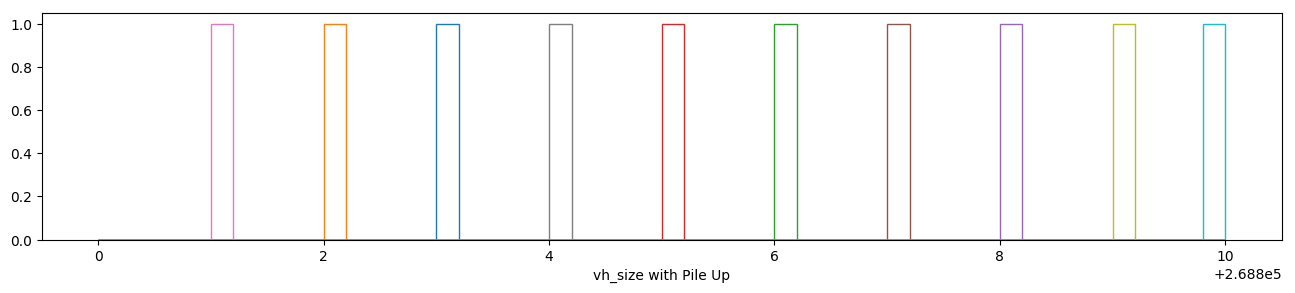

In [0]:
#Loop over events
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
for i in range(10):
  event = tree.pandas.df(["ve_event"], flatten=True, entrystart=i, entrystop=(i+1) )
  plt.xlabel("vh_size with Pile Up")
  plt.hist(event.ve_event, bins=50, range=(268800.,268810.), label='ME1/1', histtype='step')
  name='r_phi_event_'+str(i)+'.png'
  
  print(name, i)
  plt.savefig(name)
 # plt.close()

r_phi_event_0.png 0
r_phi_event_1.png 1
r_phi_event_2.png 2
r_phi_event_3.png 3
r_phi_event_4.png 4
r_phi_event_5.png 5
r_phi_event_6.png 6
r_phi_event_7.png 7
r_phi_event_8.png 8
r_phi_event_9.png 9


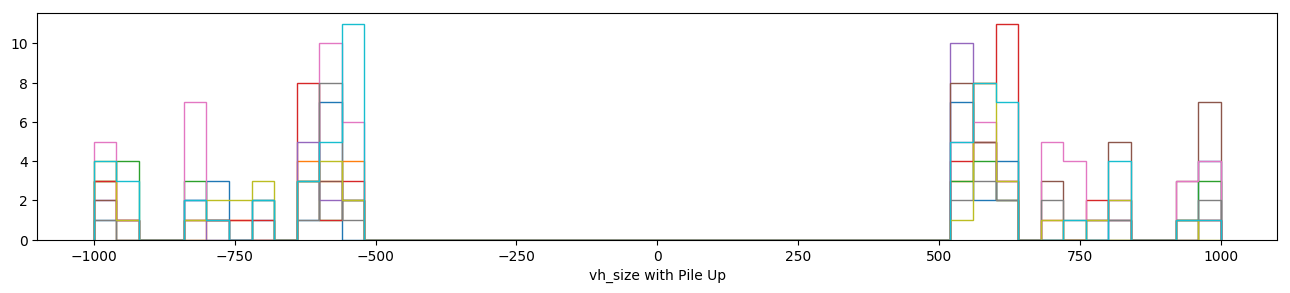

In [0]:
#Loop over events
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
for i in range(10):
  event = tree.pandas.df(["vh_sim_z"], flatten=False, entrystart=i, entrystop=(i+1) )
  plt.xlabel("vh_size with Pile Up")
  plt.hist(event.vh_sim_z, bins=50, range=(-1000.,1000.), label='ME1/1', histtype='step')
  name='r_phi_event_'+str(i)+'.png'
  
  print(name, i)
  plt.savefig(name)
 # plt.close()

r_z_event0_new.png 0


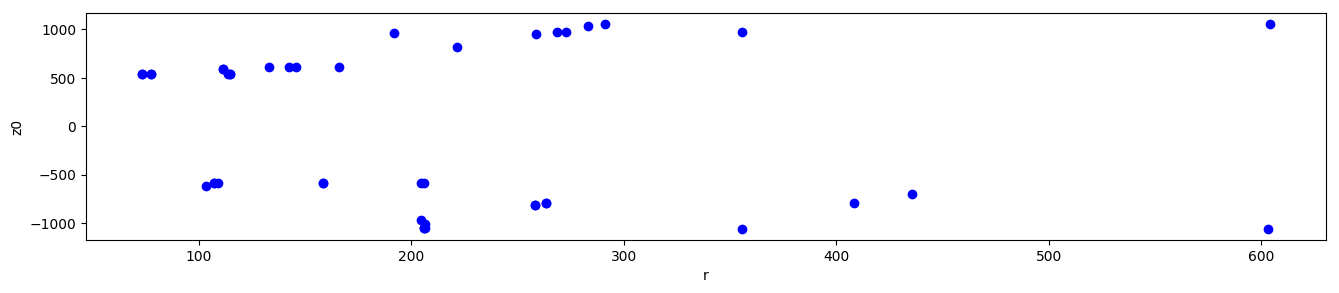

r_z_event1_new.png 1


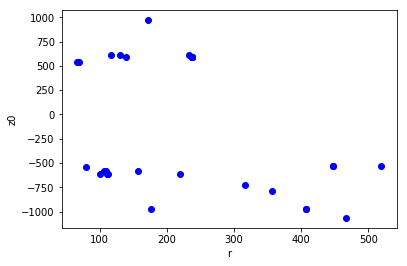

r_z_event2_new.png 2


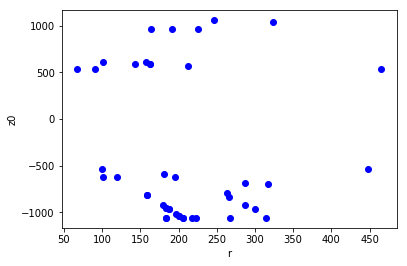

r_z_event3_new.png 3


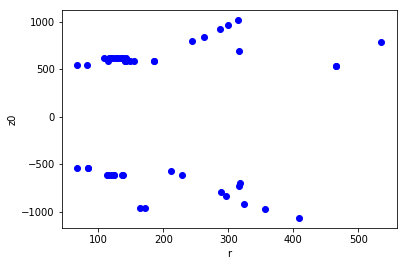

r_z_event4_new.png 4


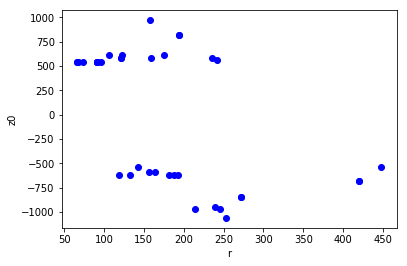

r_z_event5_new.png 5


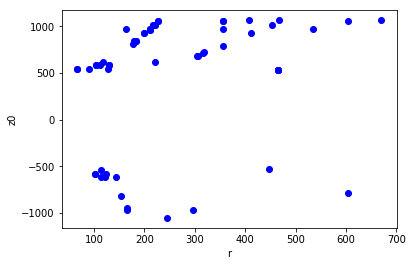

r_z_event6_new.png 6


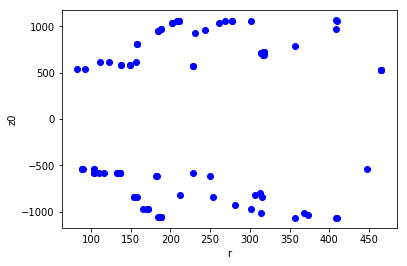

r_z_event7_new.png 7


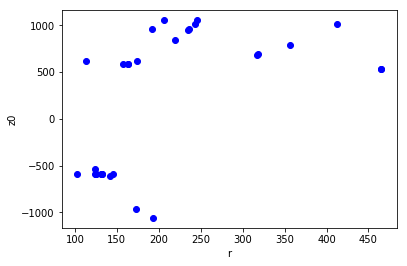

r_z_event8_new.png 8


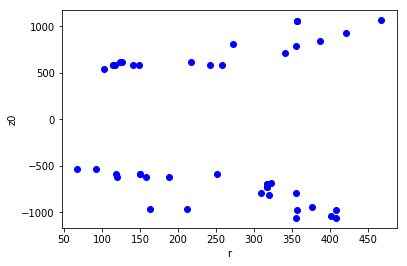

r_z_event9_new.png 9


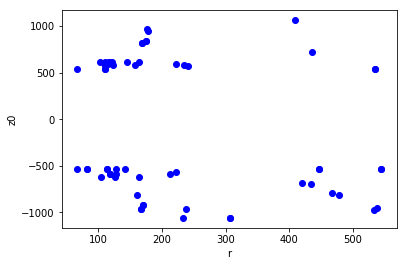

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
events = tree.pandas.df(["vh_sim_phi", "vh_sim_r","vh_sim_z"], flatten=False)
for ievt, event in events.iterrows():
  plt.xlabel("")
  
  plt.scatter(event.vh_sim_r,event.vh_sim_z, color='b', label='Event number 1')
  plt.xlabel('r')
  plt.ylabel('z0')
  name = 'r_z_event'+ str(ievt) + '_new.png'
  plt.savefig(name)
  print(name, ievt)
  plt.show()
  plt.close()
  if (ievt==9): break
  

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
events = tree.pandas.df(["vh_sim_phi", "vh_sim_r","ve_event", "vh_strip"], flatten=False)
for ievt, event in events.iterrows():
 # plt.xlabel("vh_size with Pile Up")
 # plt.hist(event.ve_event, bins=50, range=(0.,10.), label='ME1/1', histtype='step')
  plt.scatter(event.vh_sim_r[event.ve_event==268801],event.vh_sim_phi[event.ve_event==268801], color='b', label='')
  plt.savefig(name)
  print(name, ievt)
  #plt.close()
  if (ievt==9): break

IndexError: ignored

<Figure size 1600x300 with 0 Axes>

In [0]:
#Loop over events
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
for i in range(10):
  event = tree.pandas.df(["vh_size", "vh_sim_phi","vh_sim_r", "ve_event" ], flatten=False, entrystart=i, entrystop=(i+1) )
  plt.xlabel("vh_size with Pile Up")
  #plt.hist(event.vh_size, bins=50, range=(28.,31.), label='ME1/1', histtype='step')
  plt.scatter(event.vh_sim_r[event.ve_event==268801],event.vh_sim_phi[event.ve_event==268801], color='b' ,  label='ME1/3')
  name='r_phi_event_'+str(i)+'.png'
  
  print(name, i)
  plt.savefig(name)
 # plt.close()

#Test, I'll understand the variable

In [0]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(16, 3),dpi=100)

#plt.xlabel("z0")
#
#plt.hist(z0[h_type==2], bins=50, range=(580.,1000.), label='z02', histtype='step')
#plt.legend()
#plt.save.fig('r1xr2'.png)

#plt.show()

In [0]:
#for i in range(1,7):
 # phi_cms=(h_sim_phi[h_sector==i]/60)-22 +15 + (i-1)*60
 # import matplotlib.pyplot as plt
 # plt.figure(figsize=(16, 3),dpi=100)

 # plt.xlabel("z0")
 # plt.hist(phi_cms, bins=50, range=(-10,300.), label='z01', histtype='step')

#plt.hist(z0[h_type==2], bins=50, range=(580.,1000.), label='z02', histtype='step')
 # plt.legend()
#plt.save.fig('r1xr2'.png)

 # plt.show()
 # print(i, phi_cms) 
  
  



In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)

print(len(event.ve_event))
plt.xlabel("vh_size with Pile Up")
plt.hist(event.ve_event, bins=50, range=(99000.,99001.), label='ME1/1', histtype='step')
plt.legend()

plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)

print(event.ve_run)
plt.xlabel("vh_size with Pile Up")
plt.hist(event.ve_event, bins=50, range=(95000.,350000.), label='ME1/1', histtype='step')
plt.legend()

plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
plt.scatter(event.vh_sim_phi[event.vh_size==30],event.vh_sim_r[event.vh_size==30], color='b' ,  label='ME1/3')
plt.xlabel('r')
#plt.scatter(r[h_wire==1], bins=50, range=(180.,1000.), label='r1', histtype='step')
plt.ylabel('phi')
#plt.scatter(z0[h_type==1], bins=50, range=(180.,1000.), label='z01', histtype='step')
plt.legend()
#plt.save.fig('r1xr2'.png)

plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
plt.scatter(event.vh_sim_phi[event.ve_event==99200],event.vh_sim_r[event.ve_event==99200], color='b' ,  label='ME1/3')
plt.xlabel('r')
#plt.scatter(r[h_wire==1], bins=50, range=(180.,1000.), label='r1', histtype='step')
plt.ylabel('phi')
#plt.scatter(z0[h_type==1], bins=50, range=(180.,1000.), label='z01', histtype='step')
plt.legend()
#plt.save.fig('r1xr2'.png)

plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)

print(event.vh_pattern)
plt.xlabel("vh_size with Pile Up")
plt.hist(event.vh_pattern, bins=50, range=(0.,10.), label='ME1/1', histtype='step')
plt.legend()

plt.show()

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3),dpi=100)
plt.scatter(event.vh_sim_phi[event.vh_pattern==14],event.vh_sim_r[event.vh_pattern==14], color='b' ,  label='ME1/3')
plt.xlabel('r')
#plt.scatter(r[h_wire==1], bins=50, range=(180.,1000.), label='r1', histtype='step')
plt.ylabel('phi')
#plt.scatter(z0[h_type==1], bins=50, range=(180.,1000.), label='z01', histtype='step')
plt.legend()
#plt.save.fig('r1xr2'.png)

plt.show()

In [0]:
for i in range(1,7):
  phi_cms=(event.vh_sim_phi[event.vh_sector==i][event.vh_pattern==9]/60)-22 +15 + (i-1)*60
  r_cms=event.vh_sim_r[event.vh_sector==i][event.vh_pattern==9]
  import matplotlib.pyplot as plt
  plt.figure(figsize=(16, 3),dpi=100)
  plt.scatter(phi_cms,r_cms, color='b' ,  label='ME1/3')
  plt.xlabel('r')
#plt.scatter(r[h_type==1], bins=50, range=(180.,1000.), label='r1', histtype='step')
  plt.ylabel('phi')
#plt.scatter(z0[h_type==1], bins=50, range=(180.,1000.), label='z01', histtype='step')
  plt.legend()
#plt.save.fig('r1xr2'.png)

  plt.show()
  print(i, phi_cms) 